In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind_from_stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from regression_model import pearson_correlation
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15
import keras.metrics
keras.metrics.pearson_correlation = pearson_correlation

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_pg8g9b1v.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Preallocating 7713/8119 Mb (0.950000) on cuda
Mapped name None to device cuda: GeForce GTX 1080 (0000:02:00.0)


In [2]:
model_7_hg19_gc_matched_neg = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/model_7_gc_matched_neg.hdf5')

In [3]:
#X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chrs_training_summit_centered_training_set_hg19_X_gc_matched_neg.npy')
#Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chrs_training_summit_centered_training_set_hg19_Y_gc_matched_neg.npy')
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chr4_summit_centered_validation_set_hg19_X_gc_matched_neg.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chr4_summit_centered_validation_set_hg19_Y_gc_matched_neg.npy')

In [4]:
#pred_train = model_7_hg19_gc_matched_neg.predict(X_train)
pred_valid = model_7_hg19_gc_matched_neg.predict(X_valid)

Training: (array([0.75791571]), array([0.]))
Training: SpearmanrResult(correlation=0.7674512528330918, pvalue=0.0)


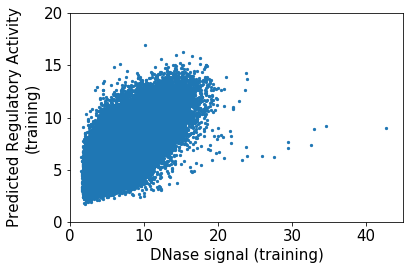

In [187]:

#plt.scatter(Y_train, pred_train, s=5)
#plt.xlabel("DNase signal (training)")
#plt.ylabel("Predicted Regulatory Activity\n(training)")
#plt.xlim([0,45])
#plt.ylim([0,20])

#plt.show()

#print("Training:",pearsonr(Y_train, pred_train))
#print("Training:",spearmanr(Y_train, pred_train))


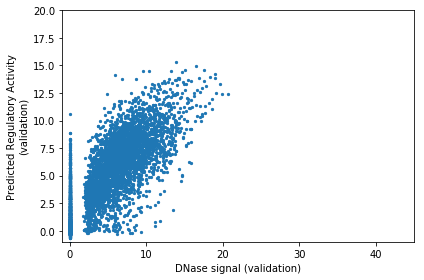

Validation: (array([0.85678209]), array([0.]))
Validation: SpearmanrResult(correlation=0.8582922972558577, pvalue=0.0)


In [6]:
plt.scatter(Y_valid, pred_valid, s=5)
plt.xlabel("DNase signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")
plt.xlim([-1,45])
plt.ylim([-1,20])


plt.show()

print("Validation:",pearsonr(Y_valid, pred_valid))
print("Validation:",spearmanr(Y_valid, pred_valid))

In [30]:
tewhey_ref_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_ref_sequences.npy")
tewhey_alt_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_one_hot_encoded_alt_sequences.npy")

In [31]:
ref_scores = model_7_hg19_gc_matched_neg.predict(tewhey_ref_sequences)
alt_scores = model_7_hg19_gc_matched_neg.predict(tewhey_alt_sequences)

In [53]:
tewhey_snp_info = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/tewhey_snps_data_extended_joined_to_1kg_mappings_with_1kb_snp_centered_sequences_with_gm_overlaps.txt",
                              sep="\t")

In [54]:
tewhey_snp_info["Ref.score"] = ref_scores
tewhey_snp_info["Alt.score"] = alt_scores
tewhey_snp_info["Predicted.skew"] = np.log2(tewhey_snp_info["Alt.score"]+2) - np.log2(tewhey_snp_info["Ref.score"]+2)

In [55]:
np.sum(np.isnan(tewhey_snp_info["Predicted.skew"]))

0

In [56]:
tewhey_snp_info.shape

(39456, 31)

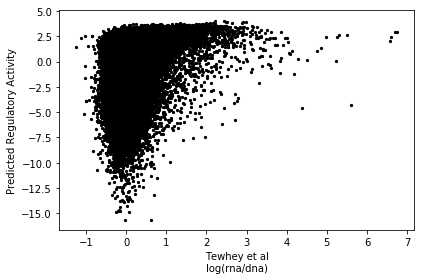

Reference Sequences: (0.3244376494432802, 0.0)
Reference Sequences: SpearmanrResult(correlation=0.2417015958240156, pvalue=0.0)
Alternate Sequences: (0.3238215393775954, 0.0)
Alternate Sequences: SpearmanrResult(correlation=0.235370867919712, pvalue=0.0)


In [58]:
plt.scatter(tewhey_snp_info["C.B.log2FC"], np.log2(tewhey_snp_info["Alt.score"]), c='k', s=5)
plt.scatter(tewhey_snp_info["C.A.log2FC"], np.log2(tewhey_snp_info["Ref.score"]), c='k', s=5)
plt.xlabel("Tewhey et al\nlog(rna/dna)")
plt.ylabel("Predicted Regulatory Activity")

plt.show()
print("Reference Sequences:",pearsonr(np.nan_to_num(tewhey_snp_info["C.A.log2FC"]), np.log2(tewhey_snp_info["Ref.score"]+2)))
print("Reference Sequences:",spearmanr(np.nan_to_num(tewhey_snp_info["C.A.log2FC"]), np.log2(tewhey_snp_info["Ref.score"]+2)))
print("Alternate Sequences:",pearsonr(np.nan_to_num(tewhey_snp_info["C.B.log2FC"]), np.log2(tewhey_snp_info["Alt.score"]+2)))
print("Alternate Sequences:",spearmanr(np.nan_to_num(tewhey_snp_info["C.B.log2FC"]), np.log2(tewhey_snp_info["Alt.score"]+2)))

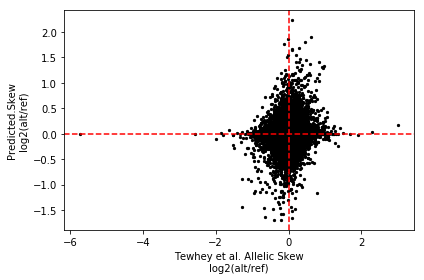

(0.09935377322380376, 4.129330319182297e-87)
SpearmanrResult(correlation=0.07209021937266578, pvalue=1.2689281087970528e-46)


In [59]:
plt.scatter(tewhey_snp_info["LogSkew.Comb"],tewhey_snp_info["Predicted.skew"] , c = 'k', s=5)
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')
plt.xlabel("Tewhey et al. Allelic Skew\nlog2(alt/ref)")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.show()
print(pearsonr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))

(0.09935377322380376, 4.129330319182297e-87)
SpearmanrResult(correlation=0.07209021937266578, pvalue=1.2689281087970528e-46)


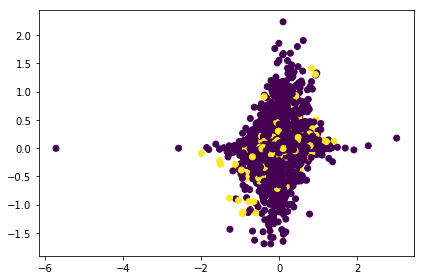

In [60]:
plt.scatter(tewhey_snp_info["LogSkew.Comb"], tewhey_snp_info["Predicted.skew"], c = tewhey_snp_info["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))
print(spearmanr(np.nan_to_num(tewhey_snp_info["LogSkew.Comb"]), tewhey_snp_info["Predicted.skew"]))

In [61]:
tewhey_snp_info_sig = tewhey_snp_info[tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
tewhey_snp_info_sig = tewhey_snp_info_sig[np.absolute(tewhey_snp_info_sig["LogSkew.Comb"])>0.5]
print(sum(np.sign(tewhey_snp_info_sig["LogSkew.Comb"]) == np.sign(np.log2(tewhey_snp_info_sig["Alt.score"]) - np.log2(tewhey_snp_info_sig["Ref.score"]))))
print(sum(np.sign(tewhey_snp_info_sig["LogSkew.Comb"]) != np.sign(np.log2(tewhey_snp_info_sig["Alt.score"]) - np.log2(tewhey_snp_info_sig["Ref.score"]))))

233
158


(0.41630258649194385, 8.044573143066463e-18)
SpearmanrResult(correlation=0.4309073462160784, pvalue=4.140843241186047e-19)


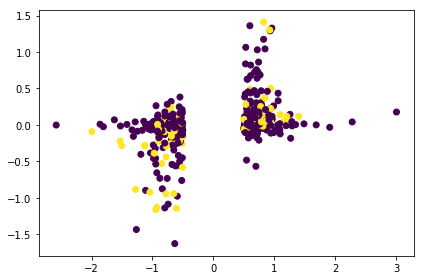

In [62]:
plt.scatter(tewhey_snp_info_sig["LogSkew.Comb"], tewhey_snp_info_sig["Predicted.skew"], c= tewhey_snp_info_sig["Num.Overlaps.GM.peaks"]>0)
print(pearsonr(np.nan_to_num(tewhey_snp_info_sig["LogSkew.Comb"]), tewhey_snp_info_sig["Predicted.skew"]))
print(spearmanr(np.nan_to_num(tewhey_snp_info_sig["LogSkew.Comb"]), tewhey_snp_info_sig["Predicted.skew"]))

In [63]:
tewhey_snp_info_pos = tewhey_snp_info[tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
tewhey_snp_info_pos = tewhey_snp_info_pos[tewhey_snp_info_pos["LogSkew.Comb"]>0.5]

tewhey_snp_info_neg = tewhey_snp_info[tewhey_snp_info["C.Skew.fdr"] > -np.log10(0.05)]
tewhey_snp_info_neg = tewhey_snp_info_neg[tewhey_snp_info_neg["LogSkew.Comb"]< -0.5]


tewhey_snp_info_neutral = tewhey_snp_info[tewhey_snp_info["C.Skew.fdr"] < -np.log10(0.05)]
tewhey_snp_info_neutral = tewhey_snp_info_neutral[np.absolute(tewhey_snp_info_neutral["LogSkew.Comb"]) < 0.5]

Ttest_1sampResult(statistic=-6.676032491169213, pvalue=2.298384028700945e-10)
Ttest_1sampResult(statistic=0.8432619735889019, pvalue=0.39914398298965403)
Ttest_1sampResult(statistic=6.731624576736567, pvalue=2.0200158154082953e-10)
Ttest_indResult(statistic=-6.745359192963416, pvalue=1.4667350473298385e-10)
Ttest_indResult(statistic=6.6074824510393615, pvalue=3.7885119246234294e-10)


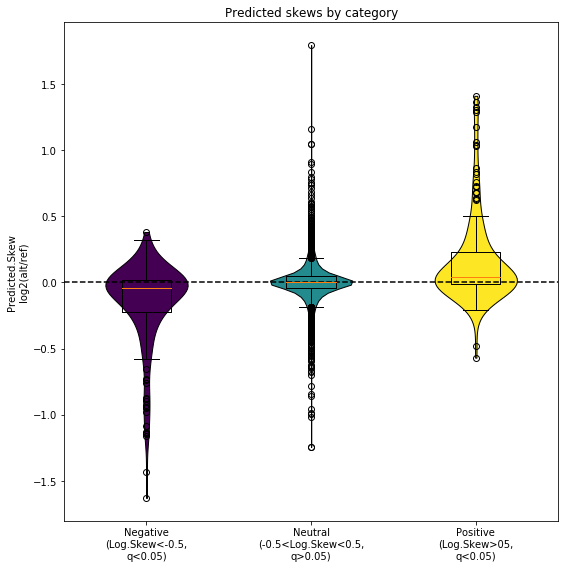

In [64]:
fig, ax = plt.subplots(figsize=(8,8))

parts = ax.violinplot(dataset=[tewhey_snp_info_neg["Predicted.skew"].tolist(), tewhey_snp_info_neutral["Predicted.skew"].tolist(), tewhey_snp_info_pos["Predicted.skew"].tolist()],showmedians=False,showextrema=False)

parts['bodies'][0].set_facecolor('#440154FF')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#238A8DFF')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)    


parts['bodies'][2].set_facecolor('#FDE725FF')
parts['bodies'][2].set_edgecolor('black')
parts['bodies'][2].set_alpha(1)   

plt.boxplot([tewhey_snp_info_neg["Predicted.skew"].tolist(), tewhey_snp_info_neutral["Predicted.skew"].tolist(), tewhey_snp_info_pos["Predicted.skew"].tolist()])
plt.axhline(y=0, c='k', linestyle='--')
plt.xticks(ticks = range(1,4), labels = ["Negative\n(Log.Skew<-0.5,\nq<0.05)", "Neutral\n(-0.5<Log.Skew<0.5,\nq>0.05)", "Positive\n(Log.Skew>05,\nq<0.05)"], horizontalalignment="center")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.title("Predicted skews by category")
print(ttest_1samp(tewhey_snp_info_neg["Predicted.skew"].tolist(),0))
print(ttest_1samp(tewhey_snp_info_neutral["Predicted.skew"].tolist(),0))
print(ttest_1samp(tewhey_snp_info_pos["Predicted.skew"].tolist(),0))
print(ttest_ind_from_stats(np.mean(tewhey_snp_info_neg["Predicted.skew"]),
                     np.std(tewhey_snp_info_neg["Predicted.skew"]),
                     len(tewhey_snp_info_neg["Predicted.skew"].tolist()),
                     np.mean(tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(tewhey_snp_info_neutral["Predicted.skew"]),
                     len(tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))
print(ttest_ind_from_stats(np.mean(tewhey_snp_info_pos["Predicted.skew"]),
                     np.std(tewhey_snp_info_pos["Predicted.skew"]),
                     len(tewhey_snp_info_pos["Predicted.skew"].tolist()),
                     np.mean(tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(tewhey_snp_info_neutral["Predicted.skew"]),
                     len(tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))

In [65]:
tewhey_snp_info_overlapping_peaks = tewhey_snp_info[tewhey_snp_info["Num.Overlaps.GM.peaks"]>0]
tewhey_snp_info_pos = tewhey_snp_info_overlapping_peaks[tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] > -np.log10(0.05)]
tewhey_snp_info_pos = tewhey_snp_info_pos[tewhey_snp_info_pos["LogSkew.Comb"]>0.5]

tewhey_snp_info_neg = tewhey_snp_info_overlapping_peaks[tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] > -np.log10(0.05)]
tewhey_snp_info_neg = tewhey_snp_info_neg[tewhey_snp_info_neg["LogSkew.Comb"]< -0.5]


tewhey_snp_info_neutral = tewhey_snp_info_overlapping_peaks[tewhey_snp_info_overlapping_peaks["C.Skew.fdr"] < -np.log10(0.05)]
tewhey_snp_info_neutral = tewhey_snp_info_neutral[np.absolute(tewhey_snp_info_neutral["LogSkew.Comb"]) < 0.5]

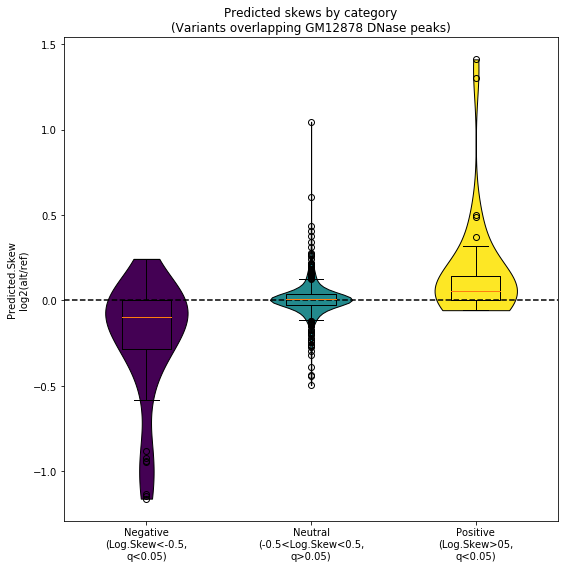

Ttest_1sampResult(statistic=-4.778784580766839, pvalue=1.485719977525051e-05)
Ttest_1sampResult(statistic=2.303294316168403, pvalue=0.02157753803057778)
Ttest_1sampResult(statistic=3.246782130187803, pvalue=0.002482357462689609)
Ttest_indResult(statistic=-4.9979755143540245, pvalue=6.757886848929978e-06)
Ttest_indResult(statistic=3.0998060578681654, pvalue=0.0036661228617661805)


In [66]:
fig, ax = plt.subplots(figsize=(8,8))

parts = ax.violinplot(dataset=[tewhey_snp_info_neg["Predicted.skew"].tolist(), tewhey_snp_info_neutral["Predicted.skew"].tolist(), tewhey_snp_info_pos["Predicted.skew"].tolist()],showmedians=False,showextrema=False)

parts['bodies'][0].set_facecolor('#440154FF')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#238A8DFF')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)    


parts['bodies'][2].set_facecolor('#FDE725FF')
parts['bodies'][2].set_edgecolor('black')
parts['bodies'][2].set_alpha(1)   

plt.boxplot([tewhey_snp_info_neg["Predicted.skew"].tolist(), tewhey_snp_info_neutral["Predicted.skew"].tolist(), tewhey_snp_info_pos["Predicted.skew"].tolist()])
plt.axhline(y=0, c='k', linestyle='--')
plt.xticks(ticks = range(1,4), labels = ["Negative\n(Log.Skew<-0.5,\nq<0.05)", "Neutral\n(-0.5<Log.Skew<0.5,\nq>0.05)", "Positive\n(Log.Skew>05,\nq<0.05)"], horizontalalignment="center")
plt.ylabel("Predicted.Skew\nlog2(alt/ref)")
plt.title("Predicted skews by category\n(Variants overlapping GM12878 DNase peaks)")
plt.show()
print(ttest_1samp(tewhey_snp_info_neg["Predicted.skew"].tolist(),0))
print(ttest_1samp(tewhey_snp_info_neutral["Predicted.skew"].tolist(),0))
print(ttest_1samp(tewhey_snp_info_pos["Predicted.skew"].tolist(),0))
print(ttest_ind_from_stats(np.mean(tewhey_snp_info_neg["Predicted.skew"]),
                     np.std(tewhey_snp_info_neg["Predicted.skew"]),
                     len(tewhey_snp_info_neg["Predicted.skew"].tolist()),
                     np.mean(tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(tewhey_snp_info_neutral["Predicted.skew"]),
                     len(tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))
print(ttest_ind_from_stats(np.mean(tewhey_snp_info_pos["Predicted.skew"]),
                     np.std(tewhey_snp_info_pos["Predicted.skew"]),
                     len(tewhey_snp_info_pos["Predicted.skew"].tolist()),
                     np.mean(tewhey_snp_info_neutral["Predicted.skew"]),
                     np.std(tewhey_snp_info_neutral["Predicted.skew"]),
                     len(tewhey_snp_info_neutral["Predicted.skew"].tolist()),
                     equal_var=False))